In [1]:
import matplotlib.pyplot as plt
import collections
import quantities as pq
import izhikevich as izhi
import numpy as np
%matplotlib inline
from utils import reduced_cells, transform_input

DELAY = 0*pq.ms
DURATION = 250 *pq.ms

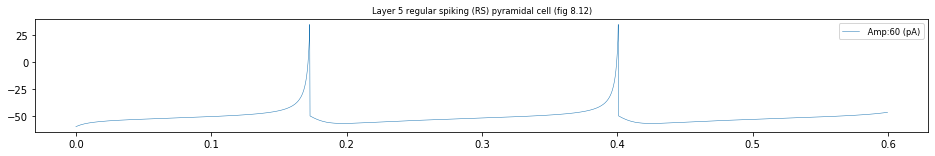

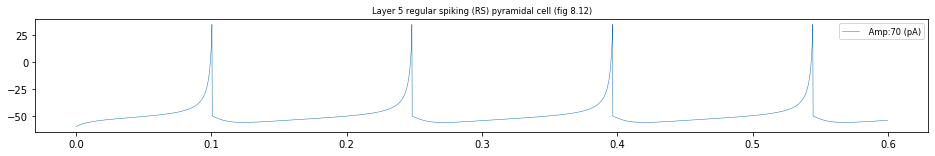

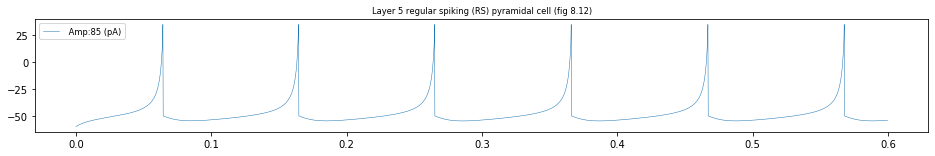

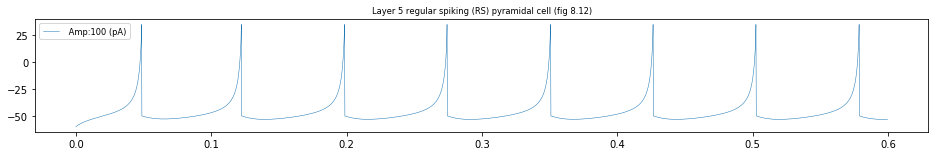

In [2]:
IinRange = [60,70,85,100];

params = {}
params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms



def plot_model(IinRange,reduced_cells,params,cell_key='RS',title='Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)'):
    for i,amp in enumerate(IinRange):
        model = izhi.IZHIModel()
        model.set_attrs(reduced_cells[cell_key])
        params['amplitude'] = amp
        model.inject_square_current(params)
        vm = model.get_membrane_potential()
        plt.figure(figsize=(16,12))

        plt.subplot(5,1,i+1)

        plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
        plt.legend()
        plt.title('Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)')
    plt.show()
plot_model(IinRange,reduced_cells,params,cell_key='RS',title='Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)')

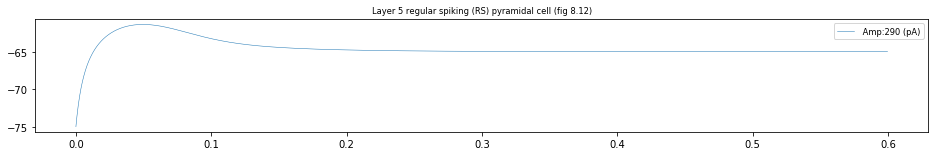

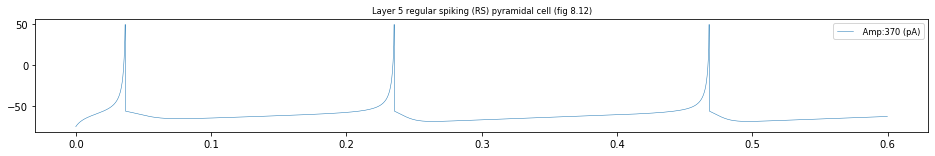

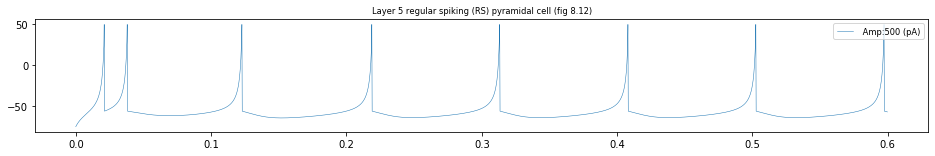

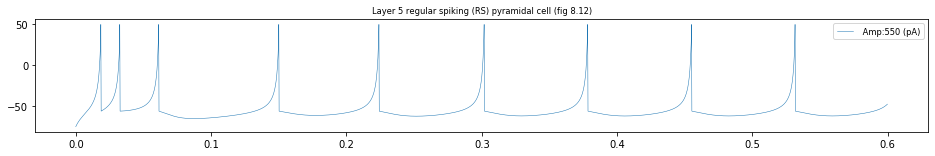

In [3]:
IinRange = [290,370,500,550];

params = {}
#params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms

'''
for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['IB'])
    params['amplitude'] = amp
    
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
    plt.title('Layer 5 intrinsic bursting (IB) pyramidal cell (fig 8.19)')
plt.show()
'''
plot_model(IinRange,reduced_cells,params,cell_key='IB',title='Layer 5 intrinsic bursting (IB) pyramidal cell (fig 8.19)')

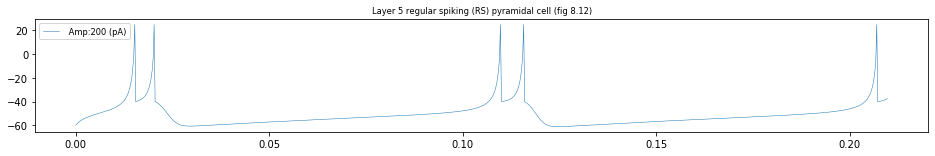

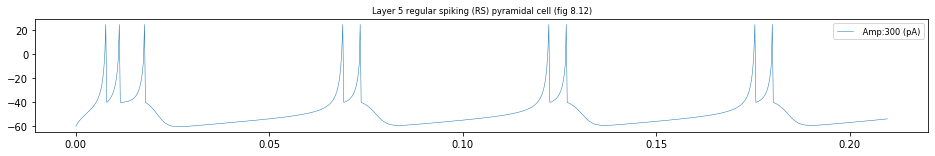

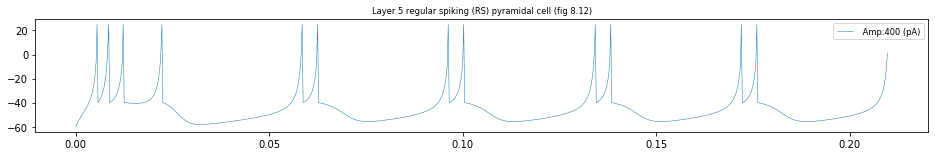

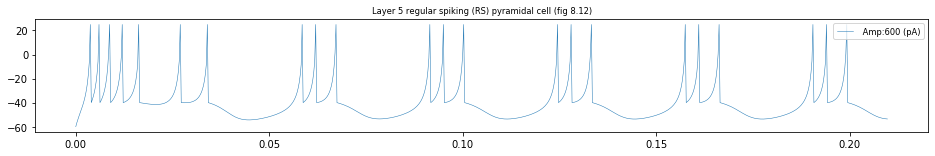

In [4]:
IinRange = [200,300,400,600];

params = {}
params['delay'] = DELAY
params['duration'] = 210*pq.ms

'''
for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['CH'])
    params['amplitude'] = amp
    
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))

    plt.legend()
    plt.title('Cortical chattering (CH) cell  (fig 8.23)')

plt.show()
'''
plot_model(IinRange,reduced_cells,params,cell_key='CH',title='Cortical chattering (CH) cell  (fig 8.23)')

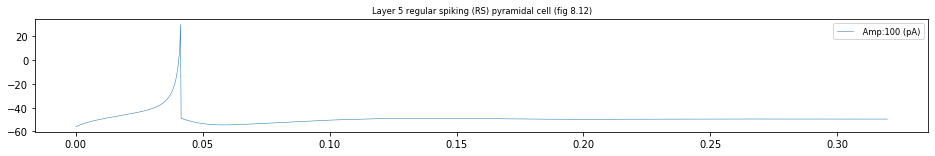

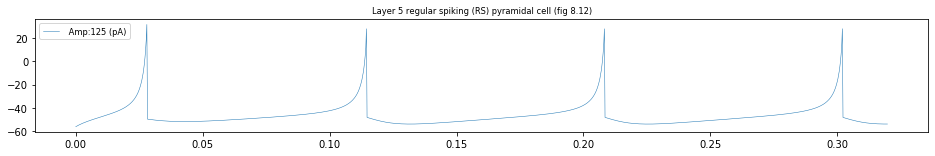

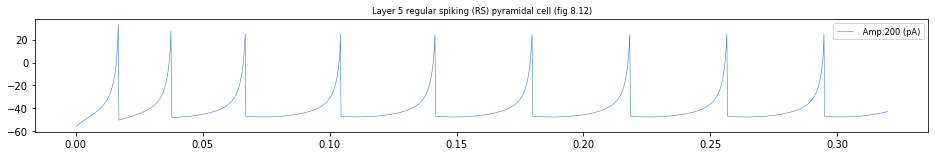

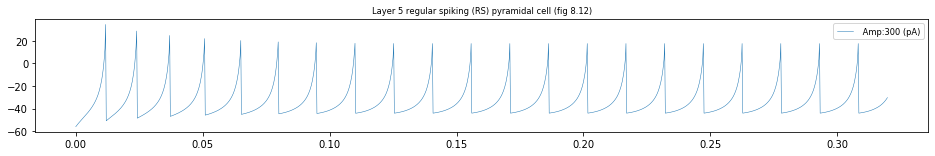

"\n\nfor i,amp in enumerate(IinRange):\n\n    model = izhi.IZHIModel()\n    model.set_attrs(reduced_cells['LTS'])\n    params['amplitude'] = amp\n    model.inject_square_current(params)\n    vm = model.get_membrane_potential()\n    plt.figure(figsize=(16,12))\n    plt.subplot(5,1,i+1)\n    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))\n    plt.xlabel(str(' Time:' )+str(' (sec)'))\n    plt.ylabel(str(' Vm: ')+str(' (mV)'))\n    plt.legend()\n    plt.title(figtitle)\n\nplt.show()\n"

In [5]:
IinRange = [100,125,200,300];

params = {}
params['delay'] = DELAY


T=320;
figtitle = 'Low-threshold spiking (LTS) interneuron (fig 8.25)';
params['duration'] = T*pq.ms
plot_model(IinRange,reduced_cells,params,cell_key='LTS',title=figtitle)

#'Cortical chattering (CH) cell  (fig 8.23)')
'''

for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['LTS'])
    params['amplitude'] = amp
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))
    plt.subplot(5,1,i+1)
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    plt.legend()
    plt.title(figtitle)

plt.show()
'''


<Figure size 720x720 with 0 Axes>

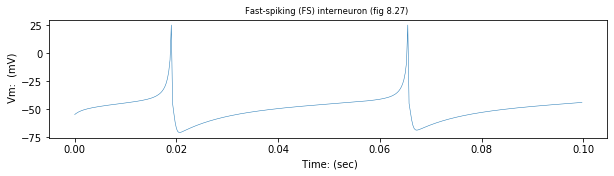

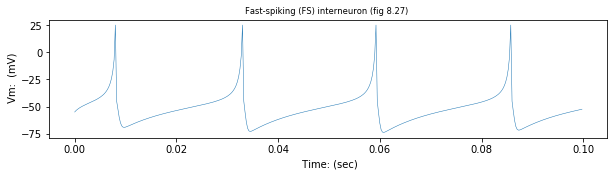

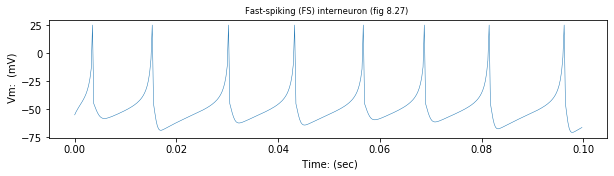

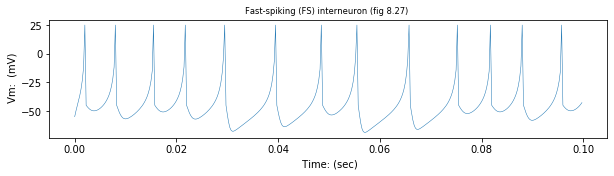

In [6]:
T=100;
IinRange = [73.2,100,200,400];

figtitle = 'Fast-spiking (FS) interneuron (fig 8.27) ';
plt.figure(figsize=(10,10))

for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    plt.figure(figsize=(10,10))
    model.set_attrs(reduced_cells['FS'])
    params['amplitude'] = amp
    params['duration'] = T
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.subplot(4,1,i+1)
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    plt.title(figtitle)
    plt.show()


# Bursting

In [7]:
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
IinRange = [0,50,100];
T=650;
IinRange = transform_input(T,IinRange,Iin0,burstMode=True)


<Figure size 720x720 with 0 Axes>

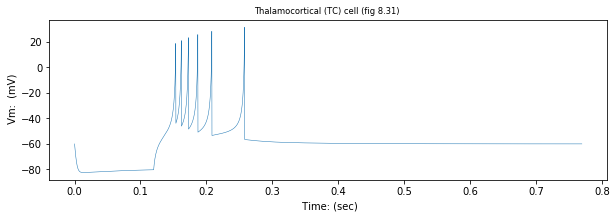

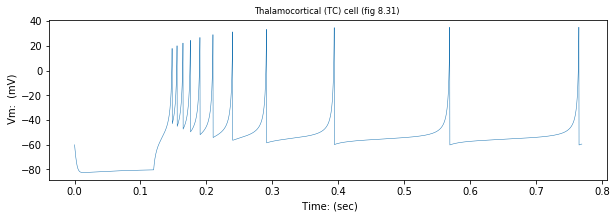

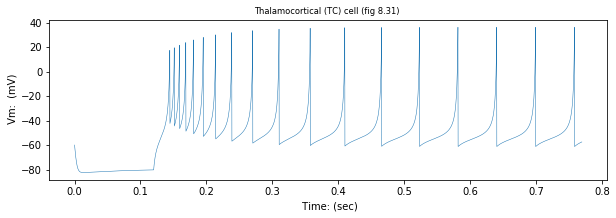

In [8]:
figtitle = 'Thalamocortical (TC) cell (fig 8.31) ';
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
plt.figure(figsize=(10,10))
for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()    
    plt.figure(figsize=(10,10))
    model.set_attrs(reduced_cells['TC'])
    vm = model.inject_direct_current(amp)
    plt.subplot(3,1,i+1)
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    plt.title(figtitle)
    plt.show()


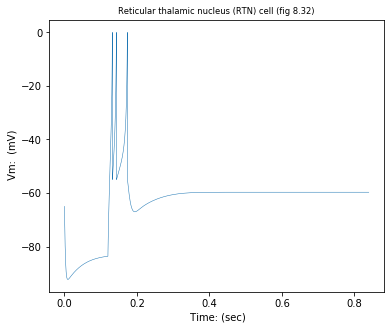

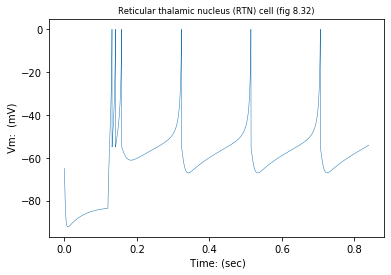

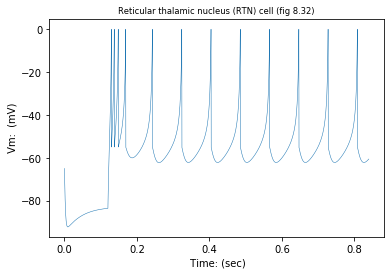

In [9]:
plt.figure(figsize=(6,5))
Iin0 = -350;
IinRange = [30,50,90];
T=720;
IinRange = transform_input(T,IinRange,Iin0,burstMode=True)
T=650;
figtitle = 'Reticular thalamic nucleus (RTN) cell (fig 8.32)';
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['RTN'])
    vm = model.inject_direct_current(amp)

    plt.subplot(3,1,i+1)
    plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    plt.title(figtitle)
    plt.show()
    
